In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_validate

df1 = pd.read_csv(r'perceptron_train.csv', header = None)
df2 = pd.read_csv(r'dataset_3classes2D.csv', header = None)
print(df1.shape, df2.shape)

(500, 3) (600, 3)


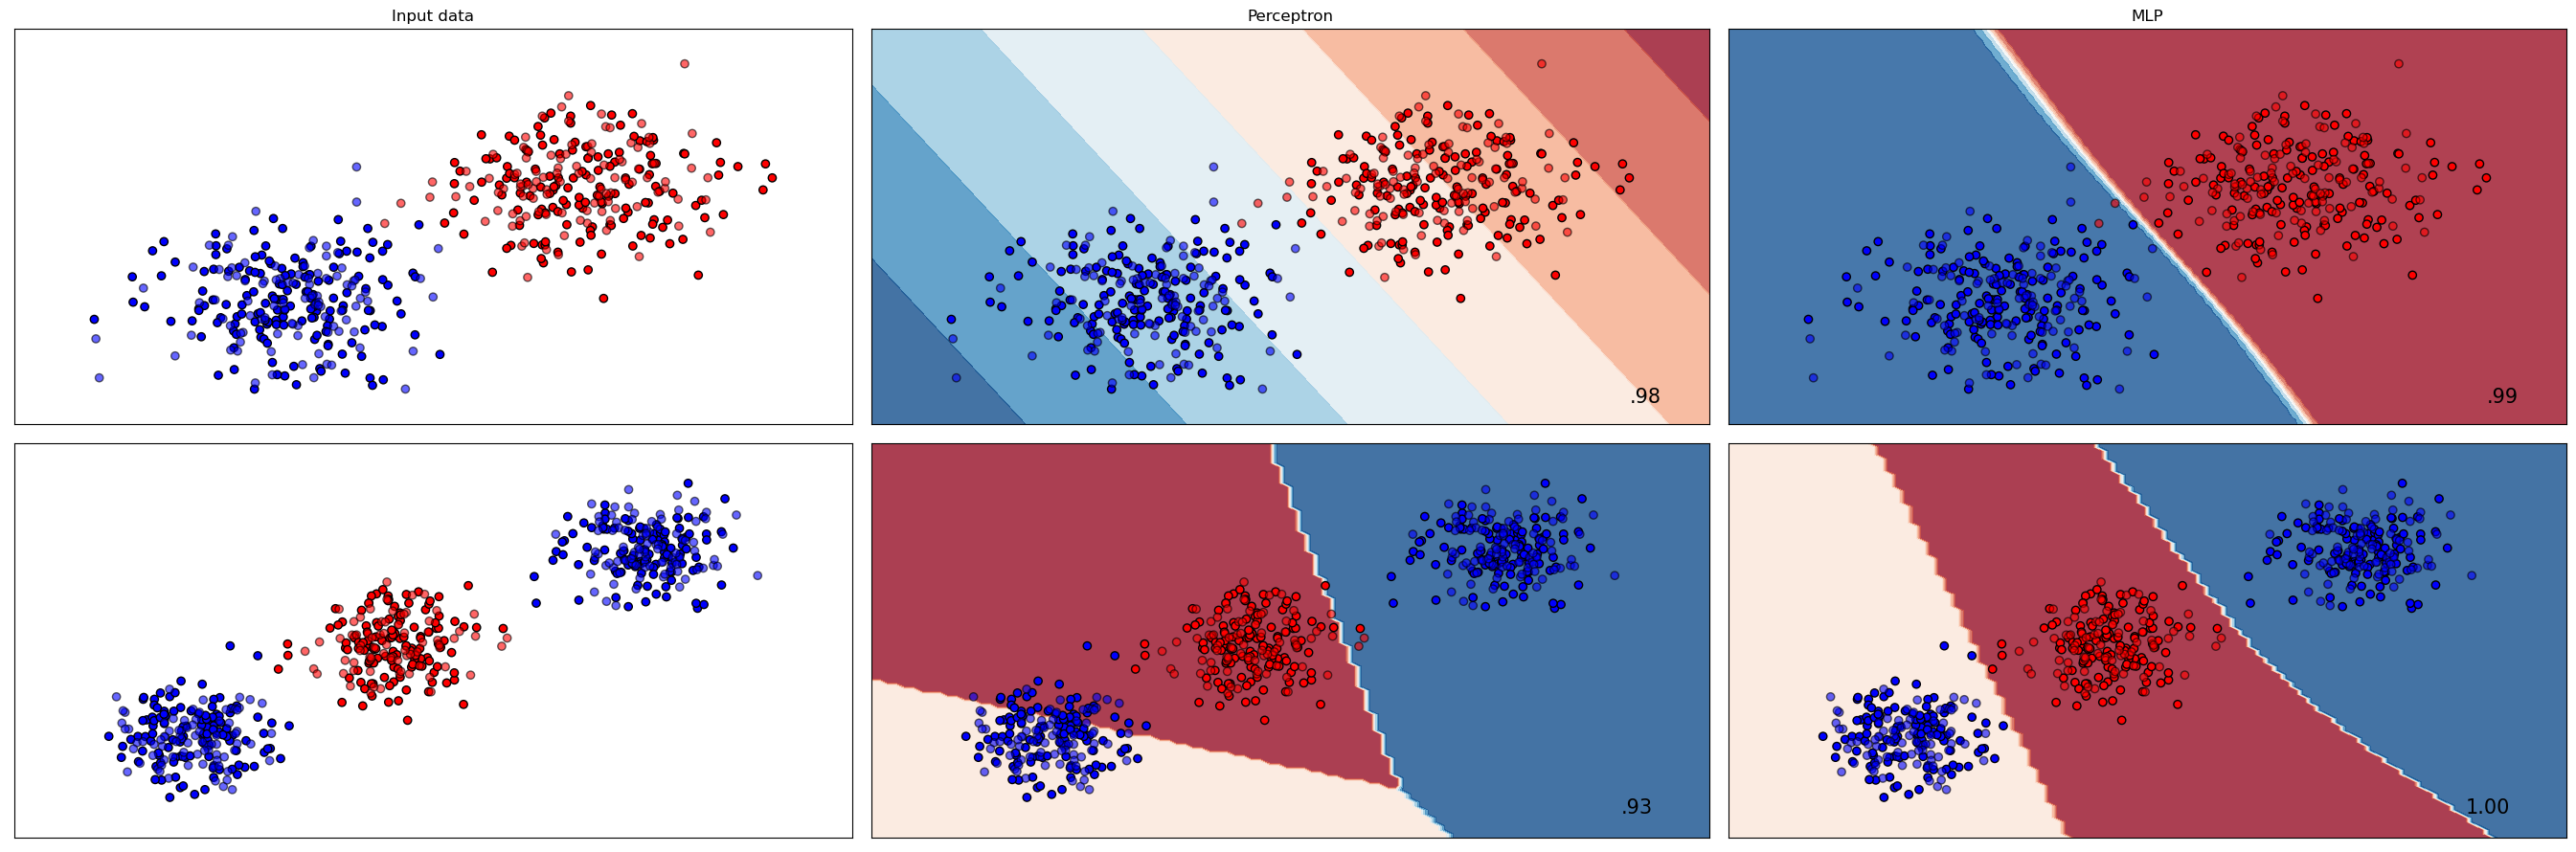

In [13]:
names = [
    "Perceptron",
    "MLP",
]

classifiers = [
    Perceptron(max_iter=1000,eta0=0.3),
    MLPClassifier(hidden_layer_sizes=4, activation="logistic", solver="lbfgs", max_iter=1000, alpha=0.0001, random_state=1),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    [df1.iloc[:,0:2], df1.iloc[:,2]],
    [df2.iloc[:,0:2], df2.iloc[:,2]],
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [14]:
scores = []
ds_nm = ['perceptron_train', 'dataset_3classes2D']
for ds_cnt, ds in enumerate(datasets):
    for clf in classifiers:
        cv_results = cross_validate(clf, ds[0], ds[1], cv=10)
        sorted(cv_results.keys())
        scores.append(cv_results['test_score'])
    print(ds_nm[ds_cnt])
    print(pd.DataFrame(np.transpose(scores), columns=names))
    scores=[]

perceptron_train
   Perceptron   MLP
0        0.98  1.00
1        0.98  0.98
2        1.00  1.00
3        0.98  0.98
4        0.98  1.00
5        1.00  0.98
6        1.00  1.00
7        1.00  1.00
8        1.00  1.00
9        1.00  1.00
dataset_3classes2D
   Perceptron       MLP
0    0.900000  0.983333
1    0.666667  1.000000
2    0.933333  1.000000
3    0.983333  1.000000
4    0.983333  1.000000
5    0.716667  1.000000
6    0.966667  1.000000
7    0.783333  1.000000
8    1.000000  1.000000
9    0.983333  1.000000
